# Load MNIST Data 

In [6]:
# MNIST dataset downloaded from Kaggle : 
#https://www.kaggle.com/c/digit-recognizer/data

# Functions to read and show images.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime


   
d0 = pd.read_csv('mnist_train.csv')

print(d0.head(5)) # print first five rows of d0.

# save the labels into a variable l.
l = d0['label']

# Drop the label feature and store the pixel data in d.
d = d0.drop("label",axis=1)

import warnings.filterwarnings
filterwarnings('ignore')

    
        


   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         

ModuleNotFoundError: No module named 'warnings.filterwarnings'; 'warnings' is not a package

In [2]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


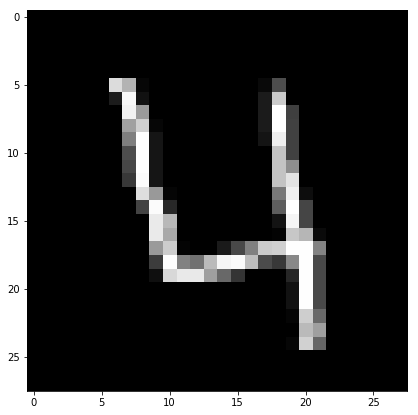

4


In [3]:
# display or plot a number.
plt.figure(figsize=(7,7))
idx = 3

grid_data = d.iloc[idx].values.reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(l[idx])

#  2D Visualization using PCA 

In [7]:
# Pick first 15K data-points to work on for time-effeciency.
#Excercise: Perform the same analysis on all of 42K data-points.

labels = l.head(15000)
data = d.head(15000)

print("the shape of sample data = ", data.shape)
print('the shape of the labels is = {}'.format(labels.shape))


the shape of sample data =  (15000, 784)
the shape of the labels is = (15000,)


In [8]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)


/home/malhar/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


(15000, 784)


/home/malhar/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [15]:
#find the co-variance matrix which is : A^T * A
sample_data = standardized_data

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T , sample_data)

print ( "The shape of variance matrix = ", covar_matrix.shape)


The shape of variance matrix =  (784, 784)


In [16]:
# finding the top two eigen-values and corresponding eigen-vectors 
# for projecting onto a 2-Dim space.

from scipy.linalg import eigh 

# the parameter 'eigvals' is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783) eigenvalues.
values, vectors = eigh(covar_matrix, eigvals=(782,783))

print("Shape of eigen vectors = ",vectors.shape)

Shape of eigen vectors =  (784, 2)


In [17]:
# projecting the original data sample on the plane 
#formed by two principal eigen vectors by vector-vector multiplication.

import matplotlib.pyplot as plt
new_coordinates = np.matmul(sample_data, vectors)

print (" resultanat new data points' shape ", sample_data.shape, "X", vectors.shape," = ", new_coordinates.shape)

 resultanat new data points' shape  (15000, 784) X (784, 2)  =  (15000, 2)


In [18]:
import pandas as pd

# appending label to the 2d projected data
new_coordinates = np.hstack((new_coordinates, labels[:,np.newaxis]))
print('shape of new_coordinates = {}'.format(new_coordinates.shape))
print()

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("2nd_principal", "1st_principal", "label"))
print(dataframe.head())

shape of new_coordinates = (15000, 3)

   2nd_principal  1st_principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


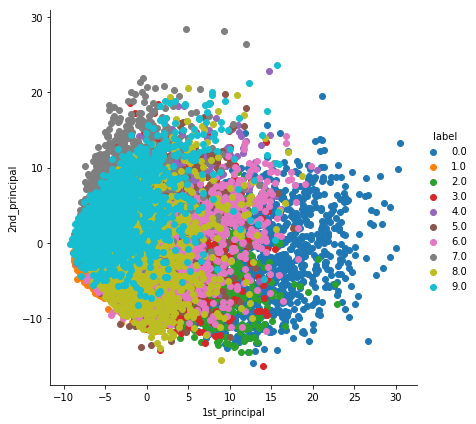

In [9]:
# ploting the 2d data points with seaborn
import seaborn as sn
sn.FacetGrid(dataframe, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

# PCA using Scikit-Learn

In [10]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()


In [24]:
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)


# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (15000, 2)


   1st_principal  2nd_principal  label
0      -5.043504      -5.558412    1.0
1      19.305270       6.193722    0.0
2      -7.678810      -1.910469    1.0
3      -0.464851       5.526172    4.0
4      26.644268       6.366769    0.0


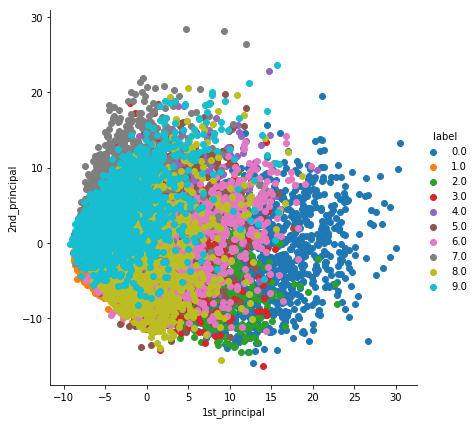

In [25]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, labels)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
print(pca_df.head())
sn.FacetGrid(pca_df, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

# PCA for dimensionality redcution (not for visualization)

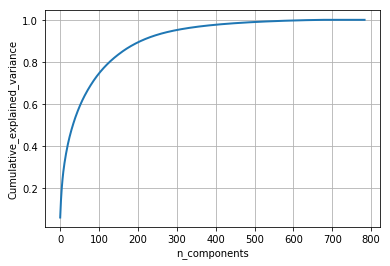

In [26]:
# PCA for dimensionality redcution (non-visualization)

pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_ratio_

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


# If we take 200-dimensions, approx. 90% of variance is expalined.

# t-SNE using Scikit-Learn

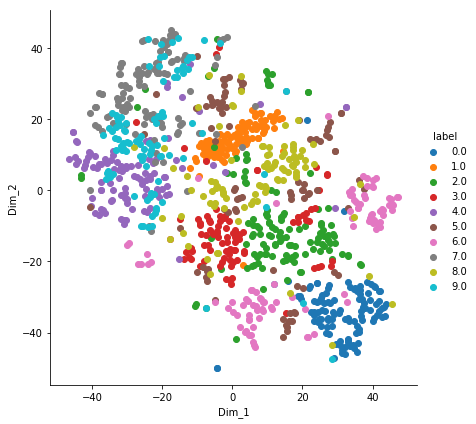

In [27]:
# TSNE

from sklearn.manifold import TSNE

# Picking the top 1000 points as TSNE takes a lot of time for 15K points
data_1000 = standardized_data[0:1000,:]
labels_1000 = labels[0:1000]

model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(data_1000)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

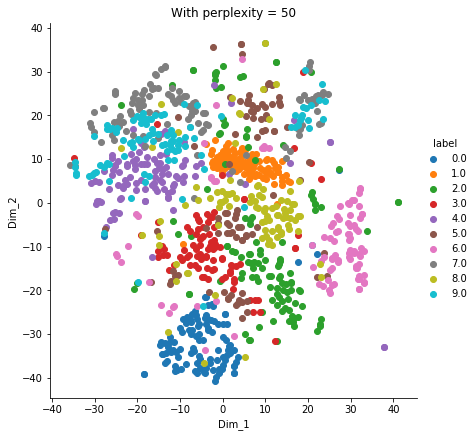

In [16]:
model = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50')
plt.show()

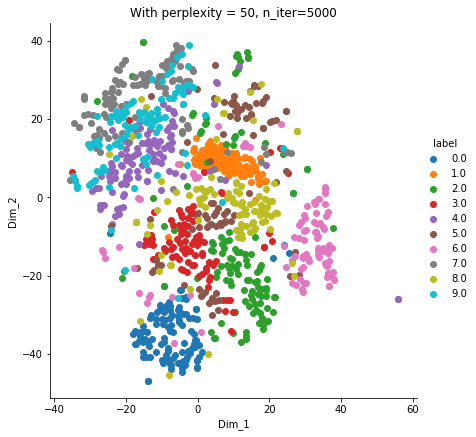

In [17]:
model = TSNE(n_components=2, random_state=0, perplexity=50,  n_iter=5000)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.hstack((tsne_data, labels_1000[:,np.newaxis]))
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50, n_iter=5000')
plt.show()

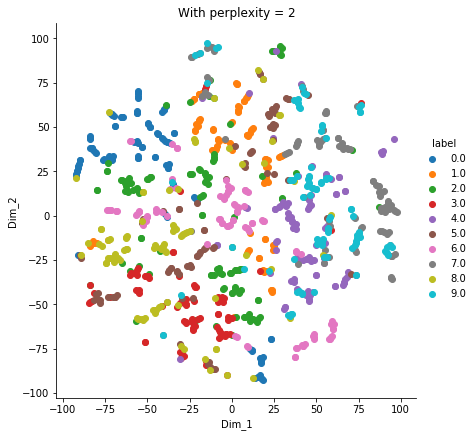

In [18]:
model = TSNE(n_components=2, random_state=0, perplexity=2)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 2')
plt.show()

## TSNE with 15k Datapoints

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 15000 samples in 1.643s...
[t-SNE] Computed neighbors for 15000 samples in 283.052s...
[t-SNE] Computed conditional probabilities for sample 1000 / 15000
[t-SNE] Computed conditional probabilities for sample 2000 / 15000
[t-SNE] Computed conditional probabilities for sample 3000 / 15000
[t-SNE] Computed conditional probabilities for sample 4000 / 15000
[t-SNE] Computed conditional probabilities for sample 5000 / 15000
[t-SNE] Computed conditional probabilities for sample 6000 / 15000
[t-SNE] Computed conditional probabilities for sample 7000 / 15000
[t-SNE] Computed conditional probabilities for sample 8000 / 15000
[t-SNE] Computed conditional probabilities for sample 9000 / 15000
[t-SNE] Computed conditional probabilities for sample 10000 / 15000
[t-SNE] Computed conditional probabilities for sample 11000 / 15000
[t-SNE] Computed conditional probabilities for sample 12000 / 15000
[t-SNE] Computed conditional probabilities for 

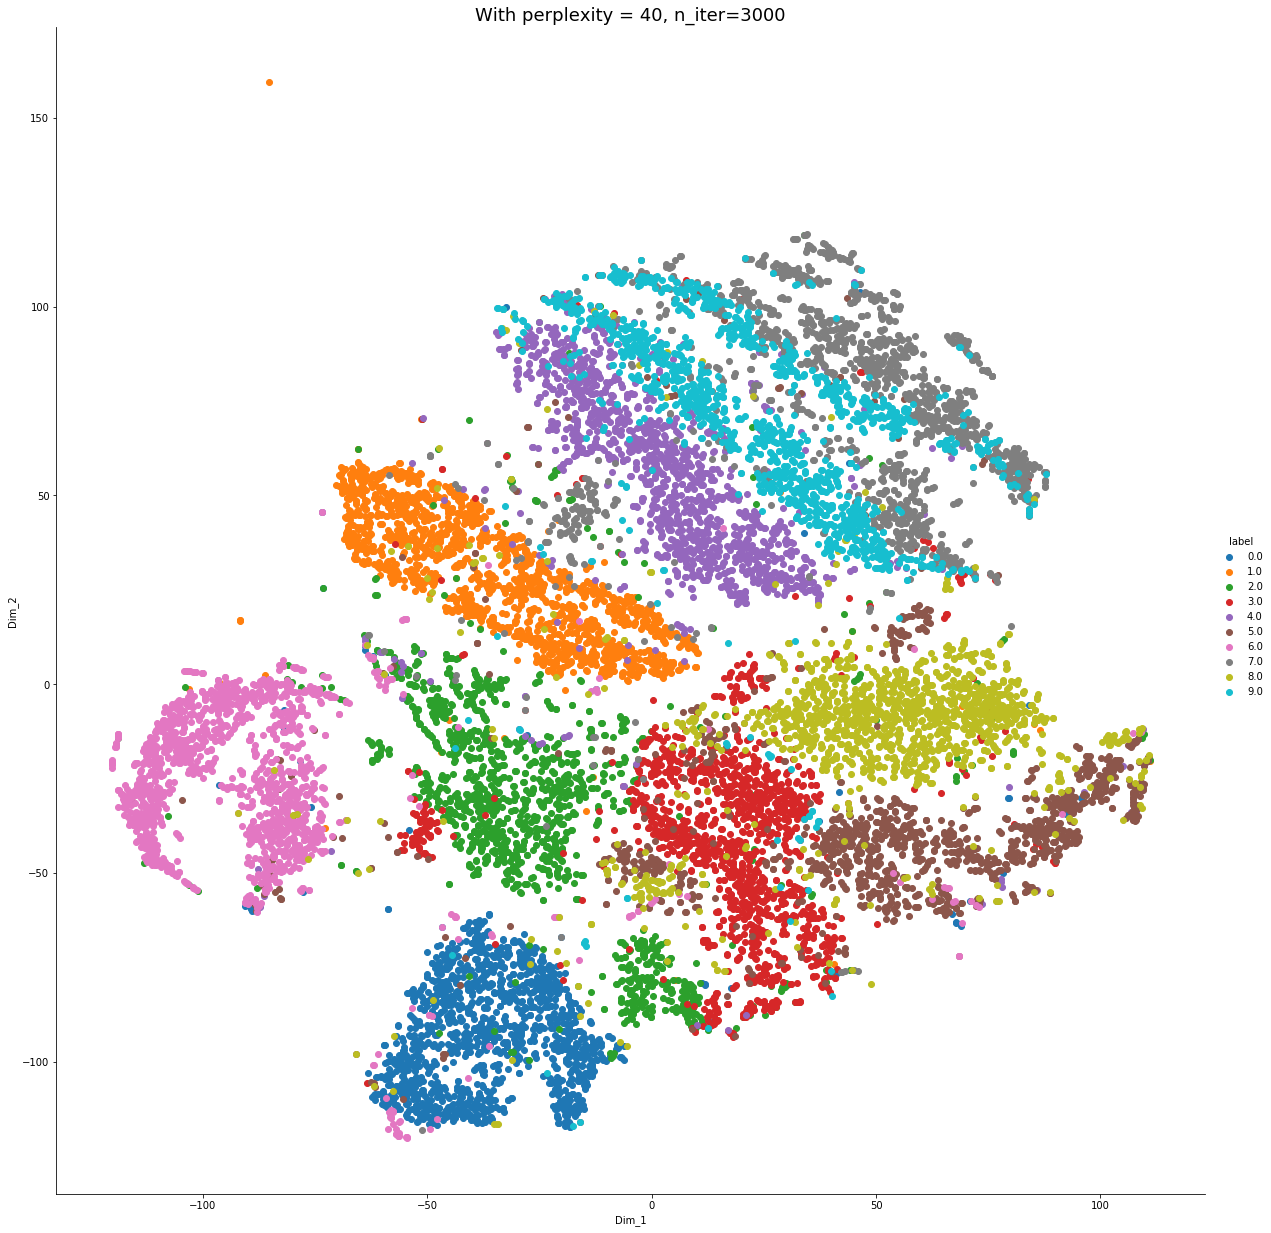

Time taken : 0:25:47.056495


In [25]:
start = datetime.datetime.now()

# Standardise the data
standardized_data = StandardScaler().fit_transform(data)

# Initialising TSNE
model = TSNE(n_components=2, perplexity=40, verbose=1, n_iter=3000, random_state=0)
tsne_data = model.fit_transform(standardized_data)

# adding labels
tsne_data = np.hstack((tsne_data, labels[:,np.newaxis]))

# Create a dataframe
tsne_df = pd.DataFrame(tsne_data, columns=['Dim_1', 'Dim_2', 'label'])

# PLotting the results of tsne.
sn.FacetGrid(tsne_df,hue='label', height=17).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 40, n_iter=3000', fontsize=18)
plt.show()
print('Time taken : {}'.format(datetime.datetime.now() - start))

## Visualizing using TSNE and PCA 
Since the number of dimensions is very high(784) we will first reduce it to a lower dimension using PCA and then use TSNE to visualise the data.

In [67]:
# configuring the parameteres
# the number of components = 70
pca.n_components = 70
pca_data = pca.fit_transform(standardized_data)

print("shape of pca_data = ", pca_data.shape)
print('Total percentage variance explained = {}'.format(np.sum(pca.explained_variance_ratio_)))

shape of pca_data =  (15000, 70)
Total percentage variance explained = 0.6593923017455208


[t-SNE] Computing 100 nearest neighbors...
[t-SNE] Indexed 15000 samples in 0.084s...
[t-SNE] Computed neighbors for 15000 samples in 55.950s...
[t-SNE] Computed conditional probabilities for sample 1000 / 15000
[t-SNE] Computed conditional probabilities for sample 2000 / 15000
[t-SNE] Computed conditional probabilities for sample 3000 / 15000
[t-SNE] Computed conditional probabilities for sample 4000 / 15000
[t-SNE] Computed conditional probabilities for sample 5000 / 15000
[t-SNE] Computed conditional probabilities for sample 6000 / 15000
[t-SNE] Computed conditional probabilities for sample 7000 / 15000
[t-SNE] Computed conditional probabilities for sample 8000 / 15000
[t-SNE] Computed conditional probabilities for sample 9000 / 15000
[t-SNE] Computed conditional probabilities for sample 10000 / 15000
[t-SNE] Computed conditional probabilities for sample 11000 / 15000
[t-SNE] Computed conditional probabilities for sample 12000 / 15000
[t-SNE] Computed conditional probabilities for s

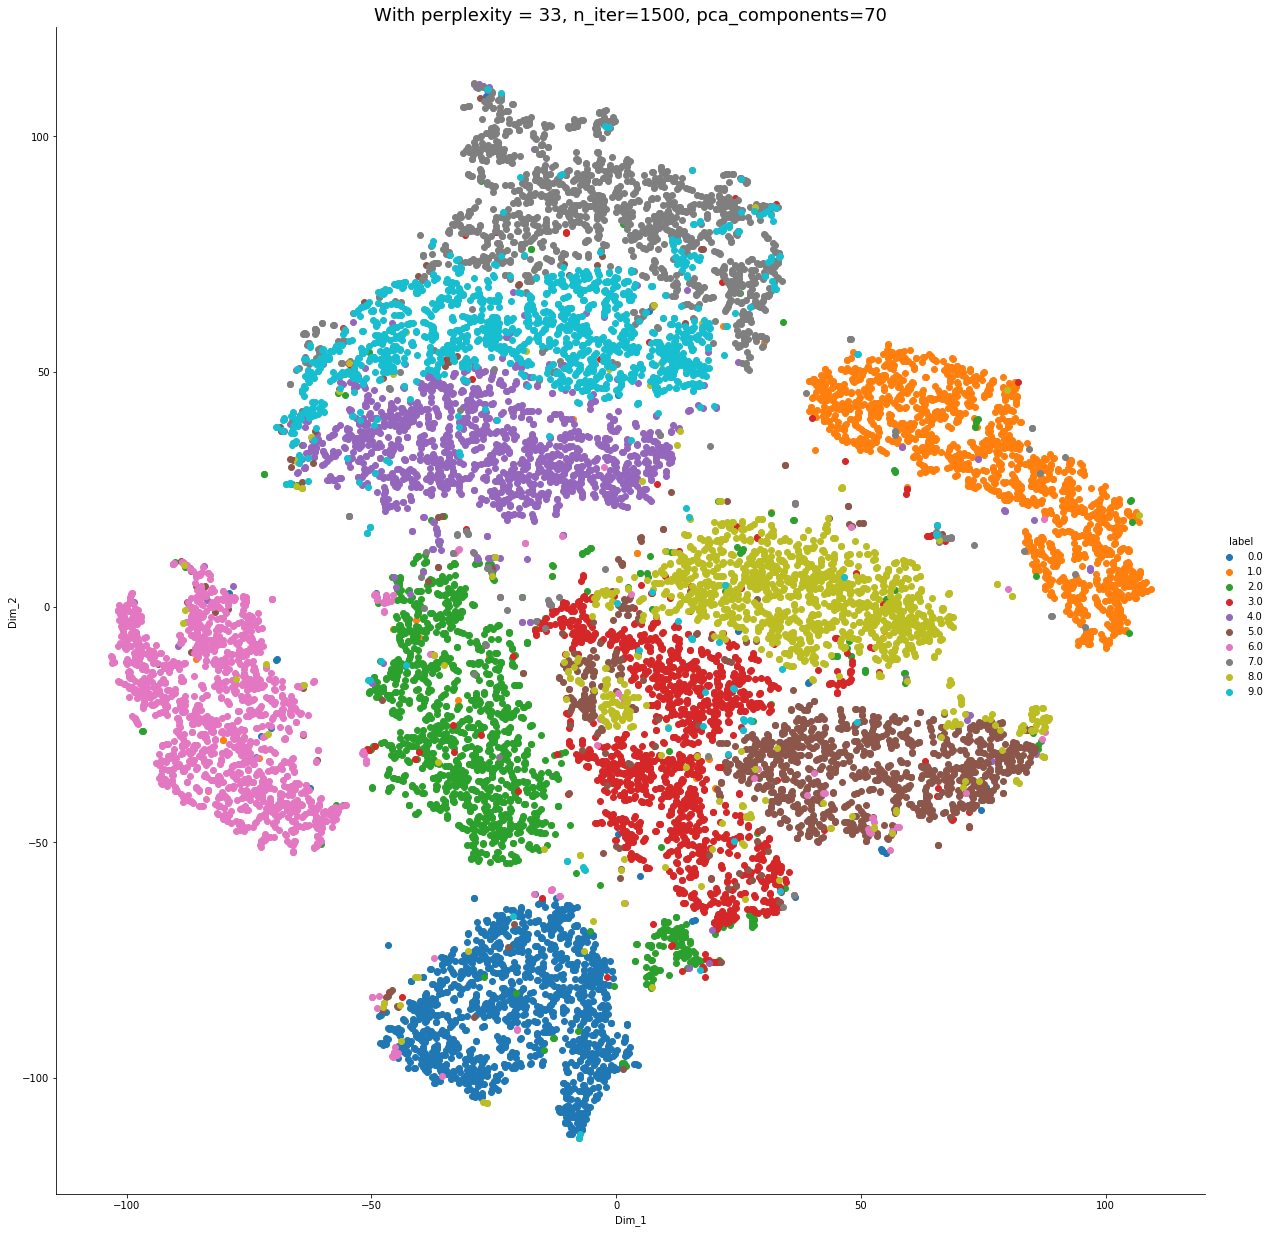

Time taken : 0:10:19.752017


In [68]:
# Applying TSNE
start = datetime.datetime.now()

# Initialising TSNE
model = TSNE(n_components=2, perplexity=33, verbose=1, n_iter=1500, random_state=0)
tsne_data = model.fit_transform(pca_data)

# adding labels
tsne_data = np.hstack((tsne_data, labels[:,np.newaxis]))

# Create a dataframe
tsne_df = pd.DataFrame(tsne_data, columns=['Dim_1', 'Dim_2', 'label'])

# PLotting the results of tsne.
sn.FacetGrid(tsne_df,hue='label', height=17).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 33, n_iter=1500, pca_components=70', fontsize=18)
plt.show()
print('Time taken : {}'.format(datetime.datetime.now() - start))